In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df=df.dropna()

In [5]:
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:

from sklearn.tree import DecisionTreeRegressor

In [9]:
dtree=DecisionTreeRegressor()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
dtree.score(X_train,y_train)

1.0

In [12]:
dtree.score(X_test,y_test)

0.6941484317067477

In [13]:
prediction=dtree.predict(X_test)

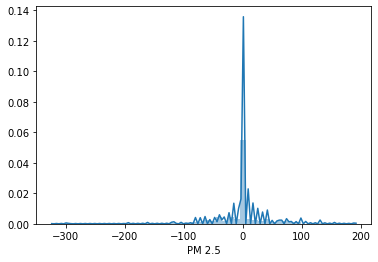

In [15]:
sns.distplot(y_test-prediction)

In [16]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [19]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [20]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 527 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 2447 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 5135 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 8591 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 12815 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 17807 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 23567 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 30095 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 37391 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 45455 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 54287 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 63887 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 74255 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 85391 t


 Time taken: 0 hours 2 minutes and 46.54 seconds.


C:\Users\Ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
predictions=random_search.predict(X_test)
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


In [25]:
import pickle 

In [26]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)